# Sentiment Analysis for MySejahtera App
### Group members : 
### Ong Horng Neng (S2191604) , Devayani a/p Balkrishnan (22056764), Oscar Looi Koon Seng (S2174066), Tan Jun Ren (22050099), Teo Kwee Kim (S2181984)

# Data Understanding and Data Preparation

## Content
- [Import Libraries](#Import-libraries)
- [Data Collection](#Data-Collection)
- [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
  - [Data Cleaning](#Data-Cleaning)
  - [Data Preprocessing](#Data-Preprocessing)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
  - [Time frame of the Review Written](#Time-frame-of-the-review-written)
  - [Number of Thumbs Up Received](#Number-of-Thumbs-Up-Received)
  - [Number of Meaningful Words](#Number-of-Meaningful-Words)
  - [Wordclouds: Most Frequently Used Words](#Wordclouds:-Most-Frequently-Used-Words)
  - [Barplots (Uni-grams & Bi-grams)](#Barplots-(Uni-grams&Bi-grams)

## Import Libraries

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from bs4 import BeautifulSoup
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from google_play_scraper import Sort, reviews

%matplotlib inline

## Data Collection

Users can rate and write reviews for MySejahtera's app on GooglePlay with a star rating and thumbs-up system. The ratings are on a 5-point scale, with 1 being the lowest rate score and 5 being the highest rate score. The goal of the project is to predict the review written is classified as positive or negative sentiment based on textual data. Our group will scrape real user reviews on GooglePlay using GooglePlay Scraper. 

Google-Play-Scraper provides an API to crawl through Google Play. We used pip install google-play-scraper to install the package and scraped users' reviews and rating scores on MySejahtera's app.

The reviews were collected in batches, according to their scores (1-5). This was done in an attempt to achieve a balanced dataset with roughly the same number of reviews for each score. Also, in order to gather reviews that had more text and were written recently, we set up the google play scraper to scrape from both review types, 'Most relevant' and 'Newest'.

#### Pre-installation for GooglePlay Scraper

_Data Collection part will be commented out to prevent accidentally generate a second set of data._

In [2]:
#pip install google-play-scraper

In [3]:
# app_pick = {
#     "mysj": ("my.gov.onegovappstore.mysejahtera", "mysj_android_reviews.csv", "mysj_android_reviews_parsed.csv"),
# }

# android_app_package, file_reviews_csv, file_reviews_parsed_csv = app_pick["mysj"]
# print(f"Pick {android_app_package}")

In [4]:
# # Function to scrape reviews on google play store
# # app: the url of the app we want to scrape
# # score: number of stars rated by users
# # n_loops: the number of loops to collect reviews in batches of 200

# def reviews_scraper(app, score, n_loops):
#      app_reviews_tmp = []
#      for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]: # Collect both reviews types - 'most relevant' and 'newest'
#          for i in range(n_loops):
#              rvs, continuation_token = reviews(app,
#                                                lang='en',
#                                                country='my',
#                                                sort=sort_order,
#                                                count=200, # 200 is the maximum number of reviews per page supported by Google Play
#                                                filter_score_with=score,
#                                                continuation_token=None if i==0 else continuation_token) # To begin crawling from where it last left off
#              for r in rvs:
#                  r['sort_order'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
#                  r['app_id'] = app
#              app_reviews_tmp.extend(rvs)
#              print(f'No. of reviews collected (score {score}): ' + str(len(rvs)))
#      return app_reviews_tmp

In [5]:
# rev_score1 = reviews_scraper(app=android_app_package, score=1, n_loops=5)
# rev_score2 = reviews_scraper(app=android_app_package, score=2, n_loops=5)
# rev_score3 = reviews_scraper(app=android_app_package, score=3, n_loops=5)
# rev_score4 = reviews_scraper(app=android_app_package, score=4, n_loops=5)
# rev_score5 = reviews_scraper(app=android_app_package, score=5, n_loops=5)
# app_reviews = rev_score1 + rev_score2 + rev_score3 + rev_score4 + rev_score5
# print(f"Collected records: {len(app_reviews)}")

In [6]:
# pd.DataFrame(app_reviews).to_csv(f'C:/Users/eoa/Downloads/{file_reviews_csv}', index=False)


In [7]:
review_data = pd.read_csv('mysj_android_reviews.csv', parse_dates = ['at', 'repliedAt'])


In [8]:
# To display the first 5 row of data
review_data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sort_order,app_id
0,ce335359-73d9-4fa6-a487-4c66cef04495,pao yin lee,https://play-lh.googleusercontent.com/a/ALm5wu...,Some buttons are unable to function. I am tire...,1,494,1.0.35,2021-07-06 20:32:00,"Dear User, Kindly force close your app and try...",2021-08-06 14:22:00,most_relevant,my.gov.onegovappstore.mysejahtera
1,81adb7e4-4b1a-467b-abb3-777e8f06bedc,Eleanor Chooi,https://play-lh.googleusercontent.com/a/ALm5wu...,After updating to the latest version which ena...,1,361,1.0.48,2021-10-21 15:38:00,"Hello, please give app permission to access fi...",2021-10-21 16:49:00,most_relevant,my.gov.onegovappstore.mysejahtera
2,3b5c2452-156b-45c3-b663-954052103ddd,Irene Lee,https://play-lh.googleusercontent.com/a/ALm5wu...,With the new tracking function automatically a...,1,201,1.1.4,2022-01-01 20:28:00,"Dear user, kindly go to device settings > apps...",2022-07-01 10:49:00,most_relevant,my.gov.onegovappstore.mysejahtera
3,2c9ed39c-ce1a-49d3-8310-6f093274078d,Nashrul Iqram,https://play-lh.googleusercontent.com/a-/ACNPE...,"This app is good, but the one that bugs me the...",1,40,1.0.39,2021-07-29 16:43:00,"Dear User, We are truly sorry for your unpleas...",2021-05-03 17:47:00,most_relevant,my.gov.onegovappstore.mysejahtera
4,e8ac5477-ae62-4607-933f-5ed9ac86a0ef,Teik Lee Teoh,https://play-lh.googleusercontent.com/a-/ACNPE...,The latest update for MySJ trace is just utter...,1,349,1.1.4,2022-04-01 09:04:00,"Dear User, We are truly sorry for your unpleas...",2022-11-01 12:12:00,most_relevant,my.gov.onegovappstore.mysejahtera


In [9]:
# 10,000 rows of data is extracted
review_data.shape

(10000, 12)

In [10]:
review_data.info

<bound method DataFrame.info of                                   reviewId                   userName  \
0     ce335359-73d9-4fa6-a487-4c66cef04495                pao yin lee   
1     81adb7e4-4b1a-467b-abb3-777e8f06bedc              Eleanor Chooi   
2     3b5c2452-156b-45c3-b663-954052103ddd                  Irene Lee   
3     2c9ed39c-ce1a-49d3-8310-6f093274078d              Nashrul Iqram   
4     e8ac5477-ae62-4607-933f-5ed9ac86a0ef              Teik Lee Teoh   
...                                    ...                        ...   
9995  62b6a1eb-bd20-417d-9f8c-5eb4ac0802ca                  Rose Wati   
9996  f3e5615a-a4d6-43cd-acca-fa779b939613      Elizabeth Regina Mary   
9997  5f4490b9-43ed-40c1-ad49-97f50c014446           Prakash Muniandy   
9998  e96475be-89ae-432c-9da3-11b35fb872a5                Fitri Rosli   
9999  57d31ff3-4ed3-45ce-a701-1792973fb463  Akmalhakim88 Akmalhakim88   

                                              userImage  \
0     https://play-lh.googleuser

In [11]:
# There is some null values in app versions and developer replies and one null value in user content
review_data.isnull().sum()

reviewId                   0
userName                   0
userImage                  0
content                    1
score                      0
thumbsUpCount              0
reviewCreatedVersion    1092
at                         0
replyContent            3718
repliedAt               3718
sort_order                 0
app_id                     0
dtype: int64

In [12]:
# Check how many records are retrieved from each type of rating score.
review_data['score'].value_counts().sort_index()

1    2000
2    2000
3    2000
4    2000
5    2000
Name: score, dtype: int64

## Data Cleaning and Preprocessing

### Data Cleaning

In [13]:
#811 duplicated row of data
review_data[review_data.duplicated(['userName', 'content', 'at'])].shape

# Check the null value in content data which is row 7922
review_data.loc[review_data["content"].isnull()]

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sort_order,app_id
7922,ecde6b48-91f4-496c-9c29-177a7e97d8ac,Azhar Mat daud,https://play-lh.googleusercontent.com/a-/ACNPE...,NaN,4,0,1.1.4,2021-12-30 10:40:00,NaN,NaT,newest,my.gov.onegovappstore.mysejahtera


In [14]:
#drop duplicated data

review_data.drop_duplicates(['userName', 'content', 'at'], inplace=True)

#drop row 7922 data which contains null value in content column
review_data.drop(7922,inplace=True)

In [15]:
# Reindex the dataframe
review_data.reset_index(drop=True, inplace=True)

#9189 rows of data left after dropping duplicated
review_data.shape

(9188, 12)

In [16]:
# Check how many records we have for each rating score after dropping duplicated data
review_data['score'].value_counts().sort_index()


1    1835
2    1721
3    1812
4    1876
5    1944
Name: score, dtype: int64

In [17]:
# Renaming the columns to lowercase and use underscore
review_data.rename(columns={'reviewId': 'review_id', 
                        'userName': 'username', 
                        'userImage': 'user_image', 
                        'thumbsUpCount': 'thumbs_up_count', 
                        'reviewCreatedVersion': 'review_created_version', 
                        'replyContent': 'reply_content',
                        'repliedAt': 'replied_at'},
              inplace=True)

In [18]:
#create a second set of data for experiment 2
review_data2 = review_data.copy()

In [19]:
#experiment 1 data set with positive 0 index 5<x<3, 1 index 2<x<1
review_data['target'] = review_data['score'].map(lambda x: 1 if x < 3 else 0)

In [20]:
#experiment 2 dataset with positive 0 index 5<x<4, 1 index 3<x<1
review_data2['target'] = review_data['score'].map(lambda x: 1 if x < 4 else 0)

In [21]:
#dataset experiment 1
review_data['target'].value_counts()


0    5632
1    3556
Name: target, dtype: int64

In [22]:
#dataset experiment 2
review_data2['target'].value_counts()

1    5368
0    3820
Name: target, dtype: int64

### Data Preprocessing

In [23]:
def stem_text(raw_text):
  
    # Remove HTML tags
    review_text = BeautifulSoup(raw_text).get_text()
    
    # Remove non-letters
    letters_only = re.sub("[^a-zA-Z]", " ", review_text)
    
    # Convert words to lower case and split each word up
    words = letters_only.lower().split()
    
    # Searching through a set is faster than searching through a list 
    # Hence, we will convert stopwords to a set
    stops = set(stopwords.words('english'))
    
    # Adding on stopwords that were appearing frequently in both positive and negative reviews 
    stops.update(['app','MySJ','Covid','Covid-19','MySejahtera','COVID-19','pandemic','Bluetooth','mysejahtera']) 
    
    # Remove stopwords
    meaningful_words = [w for w in words if w not in stops]
        
    # Instantiate PorterStemmer
    p_stemmer = PorterStemmer()
    
    # Stem words
    meaningful_words = [p_stemmer.stem(w) for w in meaningful_words]        
   
    # Join words back into one string, with a space in between each word
    return(" ".join(meaningful_words))

In [24]:
#preprocess raw text dataset #1
review_data['content_stem'] = review_data['content'].map(stem_text)

# preprocessing raw text dataset #2
review_data2['content_stem'] = review_data2['content'].map(stem_text)

C:\Users\queen\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
C:\Users\queen\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [25]:
#This is the original text of the first review in our dataset
review_data.loc[0]['content']

'Some buttons are unable to function. I am tired in trying to reinstall the app again and again. It brings alot of inconveniences, please fix it immediately. For example: when I tried to press the button to check-in, the screen remains unchanged. I understand the government is swamped under the current condition of our country, but a poorly-functional app has the risk to discourage the people to use it. Thank you.'

In [26]:
#This is how the text looks like after stemming
review_data.loc[0]['content_stem']

'button unabl function tire tri reinstal bring alot inconveni pleas fix immedi exampl tri press button check screen remain unchang understand govern swamp current condit countri poorli function risk discourag peopl use thank'

In [27]:
review_data['content_clean_len'] = review_data['content_stem'].str.split().map(len)

review_data2['content_clean_len'] = review_data2['content_stem'].str.split().map(len)


In [28]:
#96 row of data with no meaningful words
review_data[review_data['content_clean_len']==0].shape


(96, 15)

In [29]:
#viewing data

review_data[review_data['content_clean_len']==0]['content']


1008        👍
1094      for
1250        🤮
1399      🥵🥵🥵
1488        👎
        ...  
8999    👍👍👍👍👍
9067        🤗
9088       👍🏻
9119    👍👍👍👍👍
9146     Here
Name: content, Length: 96, dtype: object

In [30]:
#dropping row without meaningful words

review_data = review_data.drop(review_data[review_data['content_clean_len']==0].index)

review_data2 = review_data2.drop(review_data2[review_data2['content_clean_len']==0].index)

#reset index
review_data.reset_index(drop=True, inplace=True)

review_data2.reset_index(drop=True, inplace=True)


In [31]:
# To check non-english/gliberrish data manually

# Load the list of non-english gibberish indexes from an excel file checked manually
df = pd.read_excel('list_to_drop.xlsx',header=None)

# Select the column of numbers
column = df[0]

# Convert the column to a list of integers
review_to_drop = column.tolist()

# Print the resulting list
print(review_to_drop)

# Print the length of the list
print(len(review_to_drop))

[8, 16, 31, 105, 115, 139, 151, 156, 179, 182, 190, 204, 223, 226, 236, 247, 248, 270, 298, 301, 305, 313, 384, 389, 391, 403, 408, 410, 495, 497, 511, 538, 544, 547, 587, 593, 626, 632, 677, 711, 743, 745, 759, 769, 802, 806, 811, 818, 823, 825, 878, 901, 921, 970, 999, 1000, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1013, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1025, 1026, 1028, 1029, 1033, 1035, 1037, 1039, 1040, 1041, 1043, 1044, 1047, 1049, 1050, 1052, 1059, 1060, 1061, 1064, 1065, 1066, 1068, 1070, 1072, 1073, 1075, 1076, 1077, 1078, 1079, 1080, 1082, 1083, 1084, 1086, 1087, 1088, 1089, 1100, 1101, 1108, 1109, 1114, 1119, 1127, 1130, 1133, 1136, 1138, 1141, 1143, 1144, 1146, 1148, 1149, 1151, 1152, 1155, 1157, 1162, 1165, 1166, 1168, 1169, 1170, 1171, 1174, 1178, 1183, 1184, 1185, 1191, 1192, 1196, 1197, 1201, 1202, 1203, 1204, 1206, 1208, 1211, 1212, 1213, 1216, 1218, 1220, 1221, 1223, 1224, 1226, 1228, 1230, 1231, 1235, 1236, 1237, 1241, 1242, 1246, 1248, 1249, 12

In [32]:
# #check the review that are non-english
review_data.loc[review_to_drop,'content']

8       I see alot of rakyat are facing problem with t...
16      Takes a LONG time to load. PGcare was much qui...
31      App is quite buggy at times. Can sometimes tak...
105     Filled in the form to register an account. Sho...
115     🙏🙏🙏🙏Helpdesk login is always invalid and can't...
                              ...                        
9065                    Servis terbaik Dan mesra pengguna
9072                                           BADSHA MIA
9076                                                 BAIK
9081    Sekiranya DATA PERIBADI SAYA disalahgunakan ol...
9085                                   It’s very nice app
Name: content, Length: 1556, dtype: object

In [33]:
#drop first set of data
review_data.drop(review_to_drop,inplace=True)

#drop second set of data
review_data2.drop(review_to_drop,inplace=True)

In [34]:
#To check the row of first dataset after dropping non-english/gibberish reviews
review_data.shape

(7536, 15)

In [35]:
#To check the row of second dataset after dropping non-english/gibberish reviews
review_data2.shape

(7536, 15)

## Exploratory Data Analysis

We will perform EDA analysis to draw any insights from the dataset before it was proceed to the next phase which is Model Training.

_Please note that EDA part will solely using only dataset experiment 1 for analysis._
### Time Frame of the Review Written

We will compare the distributions of the review dates across various ratings, 1-5.

In [36]:
# Create histogram subplots for each rating (1-5)
# Each subplot represents the distribution of the dates at which the reviews were written
def subplot_histograms(main_title, list_of_titles, xlabels, list_of_colors):
    fig, ax = plt.subplots(5, 1, figsize=(8,10), sharex=True, sharey=True)
    for i in range(5):
        ax[i].hist(review_data[review_data['score']==(i+1)]['at'], bins=50, color=list_of_colors[i])
        ax[i].set_title(list_of_titles[i], weight='bold')
        ax[i].set_xlabel(xlabels)
        ax[i].set_ylabel('Frequency')
    fig.suptitle(main_title, fontsize=15, weight='bold')
    fig.tight_layout()
    fig.subplots_adjust(top=0.9)

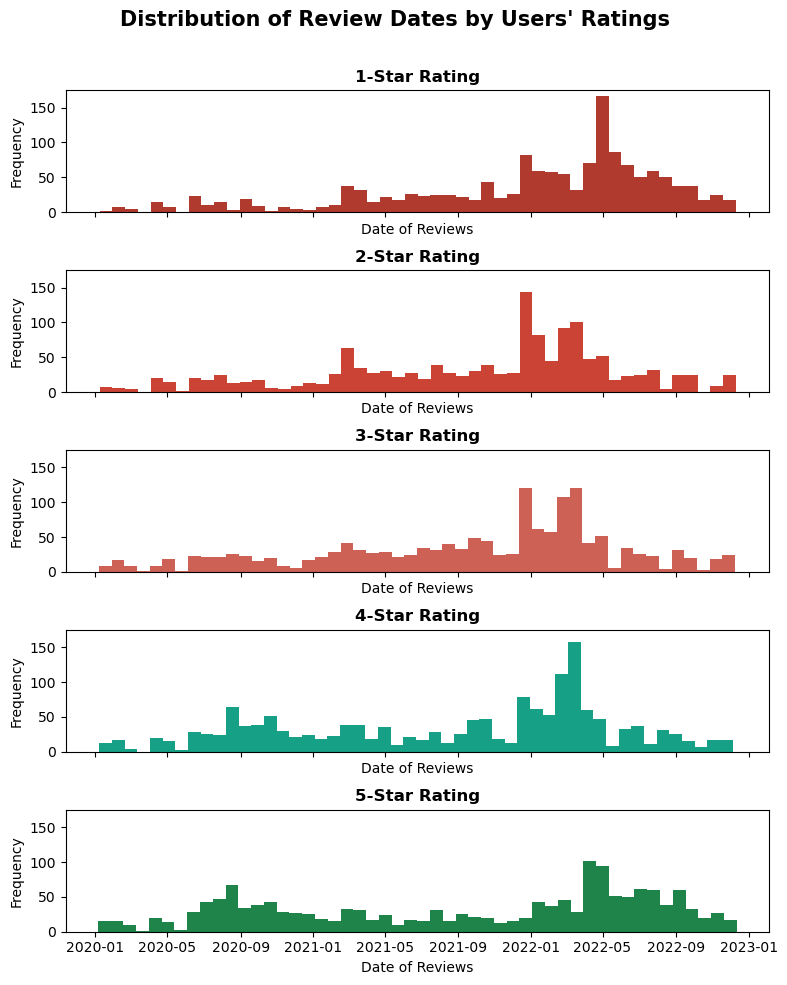

In [37]:
subplot_histograms(main_title="Distribution of Review Dates by Users' Ratings",
                   list_of_titles=['1-Star Rating','2-Star Rating','3-Star Rating','4-Star Rating','5-Star Rating'], 
                   xlabels='Date of Reviews',
                   list_of_colors = ['#B03A2E','#CB4335','#CD6155','#16A085','#1E8449'])

Based on the observation from the charts above, the distributions for each rating scores spread evenly across review dates that earliest dated back to January 2020 which is when the COVID-19 pandemic started in Malaysia. In an ideal world, we would like the reviews for each rating score to be collected in an equal quantities, over the same time period. By using the GooglePlay Scraper, despite that the reviews that we collected are not entirely in equal quantites but the gap from number of reviews between each rating score is small. In such, we are able to obtain a balanced class training set, consisting of a relatively equal split between positive and negative reviews. 

Another key observation that is worth to note here is the number of reviews for each rating score raised significantly between 2022 Jan and 2022 May. This may likely be a result of a newly introduced features in the apps which is MySJ Trace, another reason that can be identified is the arrival of the booster shot for vaccination.

In [38]:
# 324 reviews written in the context of 'vaccine'
len(review_data[review_data['content'].str.contains('vaccine')])

324

In [39]:
pd.set_option('display.max_colwidth', None)

# Reviews that mentioned the word 'vaccine'
review_data[review_data['content'].str.contains('vaccine')][['content','score']]

,content,score
46,My MySejahtera suddenly logged out..forgot my password..reset my password using mobile phone..but the link given is a log in page..not reset password page at all!!!!then i tried to register my id using email... everything ok..but when i tried to verify my account..to update my vaccine status.. nothing happen..please fix!!!!!!,1
54,I registered did everything asked for uploaded my overseas vaccines and logged out .tried to log in and can not requested new password but it doesent send me the link also i tried with my phone number but it wont so now i have wasted my time so i can not visit KL as i want to have access to the app incase i need,1
71,Terrible application. Seem good at first glance but never approve the vaccine certificate I gave even though it was certified international certificate from my country. I also complained in the app itself (in HELPDESK) many times but it never takes any action. It has been over a week already. Never thought Malaysia's national standard is this unreliable.,1
86,"Useless app. I can't even download my vaccine cert. I expected to not have any problems but I have been trying to download since yesterday and I can't. Tried to contact someone in the help desk but as usual, no one replies or responds. Absolutely useless",1
90,"Got calls from KKM asking to do self assessment via app but the function doesn't work. After complete form, it wouldn't submit. Have been having issues managing dependents since I port my acc to new phone. Can't view vaccines records etc. Useless app.",1
...,...,...
8025,"anyone that have missing vaccine status and when try to update but have server error, you can go to your phone apps, find mysejahtera apps, clear data, and relogin the apps.",5
8081,I cant register for vaccine. its been weeks and i tried every day. i already delete my old acc and make a new one and also force stop but it still stuck at the submit button. please i just want to be vaccinated. update : now I can submit,5
8156,When I answered all the questions and click 'ok' but nothing updated. And my latest status also can't update. How should I do. And my status can't refresh. And I can't register for vaccine.,5
8165,Hi I am having difficulties downloading my digital certificate. I got my vaccines in Malaysia and I am currently overseas. I am trying to download the certificate to use for my home quarantine application but it keeps saying 'permission was denied'. Please assist me! Thank you!,5


### Number of Thumbs Up Received

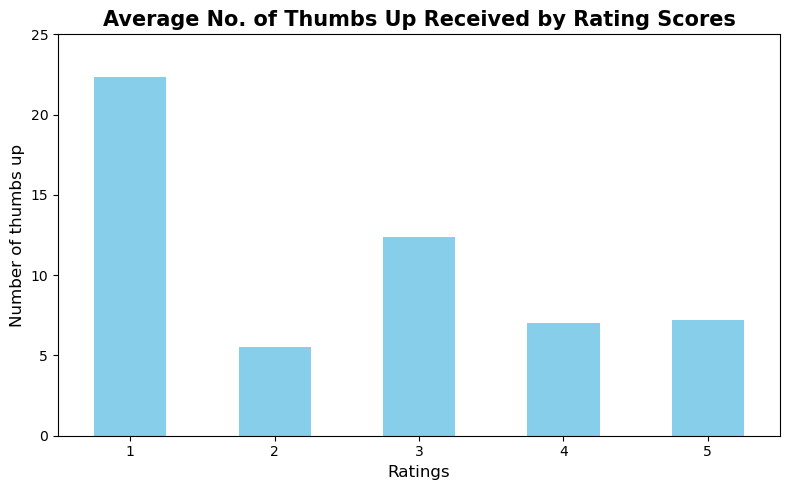

In [40]:
# Group by rating scores and find the average no. of thumbs up per score
review_data.groupby('score')['thumbs_up_count'].mean().plot(kind='bar', figsize=(8,5), color='skyblue')
plt.xlabel('Ratings', fontsize=12)
plt.xticks(rotation=0)
plt.ylabel('Number of thumbs up', fontsize=12)
plt.ylim(0,25)
plt.title('Average No. of Thumbs Up Received by Rating Scores', fontsize=15, weight='bold')
plt.tight_layout();

Negative reviews with 1 star rating received significantly more thumbs up on average when comparing to other star rating.

In [41]:
# Show the top 5 reviews that received the highest number of thumbs up
review_data[['content','thumbs_up_count','score']].sort_values(by='thumbs_up_count', ascending=False).head()

,content,thumbs_up_count,score
7346,"(Original review: 3 stars) For those who have difficulty registering after installing, please go to the MySejahtera website using browser to register. The process is fast and smooth, and you can login through your mobile app immediately after that. Update on 28 July 2020. (5 stars) MySejahtera is fast and easy to check in. I use it everyday. Keep up the good work!",2686,5
3682,"Just a suggestion to app developers, the app so good but, I would like to suggest auto check out when it reaches 15 minutes or auto check out using location data when people are no longer in their check in place for more than 15 minutes, because not just me, but many people encounter where they totally forget to check out from the app and only realize it the next day, which is a hassle and worrying at some point. Take your time, I'll be waiting for the new version with this feature. Cheers!!",2099,3
3572,"I think there might have some issue about your update for this app. I didn't get any notice from play store to reinstall / update the app. Few weeks before this, the app worked just fine, but one day the app suddenly can't check-in although my location, and network works fine. I reinstall the app and found out there is an update. To the user who face the same problem, reinstall will solve the problem.",1526,3
7355,"After using the App for some time now, I think that to have a better contact tracing, the App should require 2 scans. Currently, we only scan when we enter business premises, but not when we exit. We may spend 2 minutes at a restaurant to pick up food or 2 hours for a lunch/dinner with family or friends. A week later, we won't remember how long we spent there. If we scan when we exit, it will enable the authorities to determine who is at risk of exposure to Covid-19.",1403,5
13,"The app keeps clashing all the time. I have just registered an account, but the app keeps saying my id is invalid. After it log-in, it only give me and check in button, when I press it, it doesn't happen anything.... I hope people can do some maintainance on it, you need people to use it when they go into shops, but we can't even use this app because it doesn't function well at all.",1283,1


### Number of Meaningful Words

We will compare the length of the reviews among positive vs negative sentiments.

C:\Users\queen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\queen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


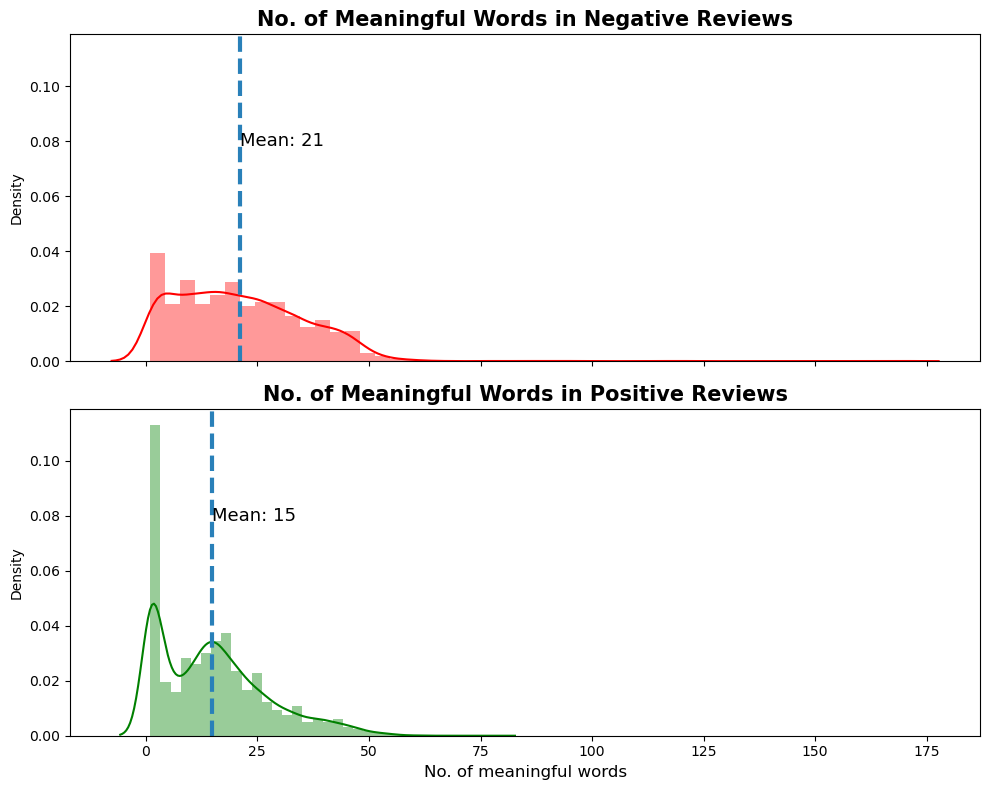

In [42]:
fig, ax = plt.subplots(2, 1, figsize=(10,8), sharex=True, sharey=True)

# Plots the distribution of the length of negative reviews
neg_len = review_data[review_data['target']==1]['content_clean_len']
sns.distplot(neg_len, color='red', ax=ax[0])
ax[0].axvline(neg_len.mean(), linestyle='dashed', linewidth=3, c='#2980B9') # Plot the mean line
ax[0].text(x=neg_len.mean(),
           y=0.08,
           s=f'Mean: {round(neg_len.mean())}', 
           horizontalalignment='left', 
           verticalalignment='center',
           fontsize=13)
ax[0].set_title('No. of Meaningful Words in Negative Reviews', fontsize=15, fontweight='bold')
ax[0].set_xlabel('No. of meaningful words', size=12)

# Plots the distribution of the length of positive reviews
pos_len = review_data[review_data['target']==0]['content_clean_len']
sns.distplot(pos_len, color='green', ax=ax[1])
ax[1].axvline(pos_len.mean(), linestyle='dashed', linewidth=3, c='#2980B9') # Plot the mean line
ax[1].text(x=pos_len.mean(),
           y=0.08,
           s=f'Mean: {round(pos_len.mean())}', 
           horizontalalignment='left', 
           verticalalignment='center',
           fontsize=13)
ax[1].set_title('No. of Meaningful Words in Positive Reviews', fontsize=15, fontweight='bold')
ax[1].set_xlabel('No. of meaningful words', size=12)
plt.tight_layout();

Based on the observation from the charts above, both distribution are right skewed with only a small proportion of post that have >50 meaningful words. The average number of meaningful words in negative reviews (21 words) is higher than the number of meaningful words written in positive reviews (15 words). This can further implies that dissatisfied customer are more likely to write longer reviews.

In [43]:
# Number of reviews that had >40 meaningful words
review_data[review_data['content_clean_len']>40]['target'].value_counts().sort_index()

0    194
1    309
Name: target, dtype: int64

In [44]:
review_data['target'].value_counts()

0    4662
1    2874
Name: target, dtype: int64

In [45]:
194/4662

0.041613041613041614

Only about 4.16% of positive reviews have > 40 meaningful words.

In [46]:
309/2874

0.10751565762004175

About 10.8% of negative reviews have > 40 meaningful words.

### Wordclouds: Most Frequently Used Words

Word clouds are useful in visualising some of the most frequently occurring words in positive and negative reviews.

In [47]:
# Write a function to plot a wordcloud of the most frequently occurring words

def plot_wordcloud(target, title):
    
    # Clean text that we want to wordcloud. Target will be class 1 (negative reviews) or class 0 (positive reviews)
    text = review_data[review_data['target']==target]['content_stem'] 

    wordcloud = WordCloud(width=2000, 
                          height=1000, 
                          background_color='white', 
                          max_words=50, # Maximum no. of words in the wordcloud
                          stopwords=STOPWORDS).generate(' '.join(text)) # Remove stopwords
    
    plt.figure(figsize=(10,8))
    plt.title(title, fontsize=15, weight='bold')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off') # Removes the axis
    plt.tight_layout()

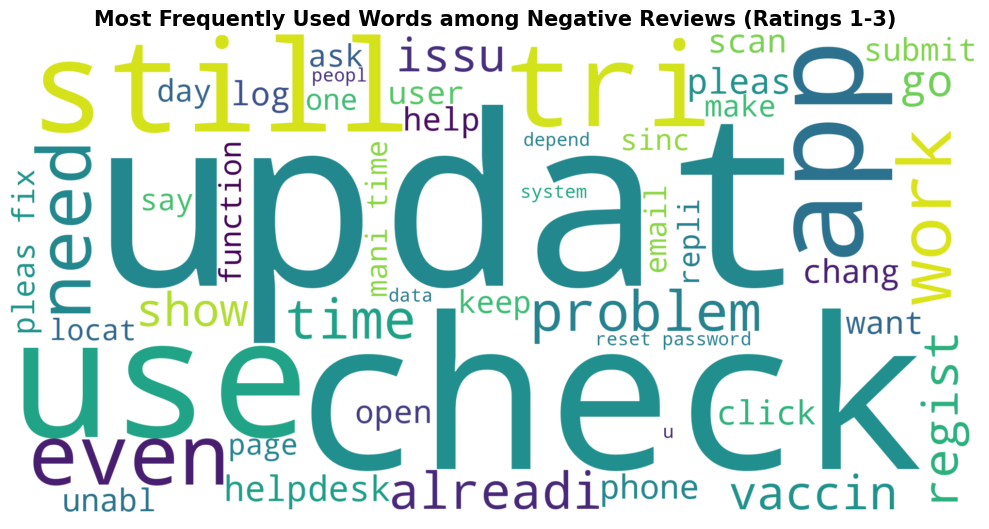

In [48]:
# Wordcloud of the 50 most frequently occurring words among negative reviews
plot_wordcloud(target=1, title='Most Frequently Used Words among Negative Reviews (Ratings 1-3)')

The words 'updat' and 'check' are the most frequently seen words among reviews with negative sentiments.

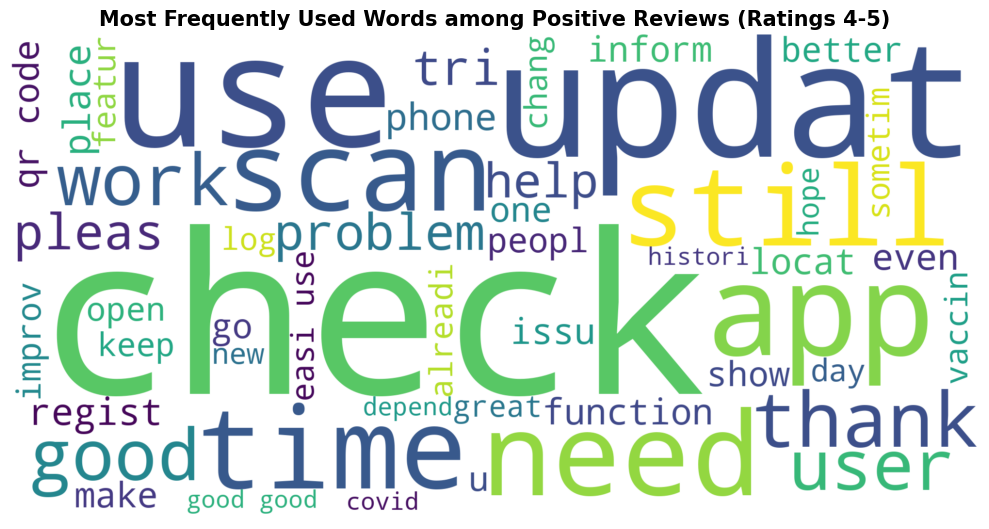

In [49]:
# Wordcloud of the 50 most frequently occurring words among positive reviews
plot_wordcloud(target=0, title='Most Frequently Used Words among Positive Reviews (Ratings 4-5)')

Although the words 'check' and 'update' are still on the top words seen in the reviews, words like 'thank', 'good' is showing up in positive reviews.

### Barplots (Uni-grams & Bi-grams)

In [50]:
# Plots top 20 uni-grams and bi-grams for positive and negative reviews

def barplot_cvec(target, titles, color, xlimit):
    
    words_series = review_data[review_data['target']==target]['content_stem']
    
    fig, ax = plt.subplots(1, 2, figsize=(25,12))
    
    ngram = [(1,1),(2,2)] # The ngrams that we would like to plot
    
    for i in range(2):
            
        # Use CountVectorizer to tokenize the text, 
        cvec = CountVectorizer(stop_words='english', ngram_range=ngram[i])

        # Save the tokens in a dataframe
        cvec_df = pd.DataFrame(cvec.fit_transform(words_series).todense(), columns=cvec.get_feature_names_out())
        sum_words = cvec_df.sum(axis=0) # Sum up the no. of occurences for each word
        top_words = sum_words.sort_values(ascending=False).head(20)
        top_words.sort_values(ascending=True).plot(kind='barh', color=color, ax=ax[i])

        # Adjust plot aesthetics
        ax[i].set_title(titles[i], size=25, weight='bold')
        ax[i].set_xlabel('Count', size=20)
        ax[i].set_xlim(xlimit) # Setting a limit so that the barplots are comparable
        ax[i].tick_params(axis='both', which='major', labelsize=20)
        ax[i].tick_params(axis='both', which='minor', labelsize=20)

    plt.tight_layout()

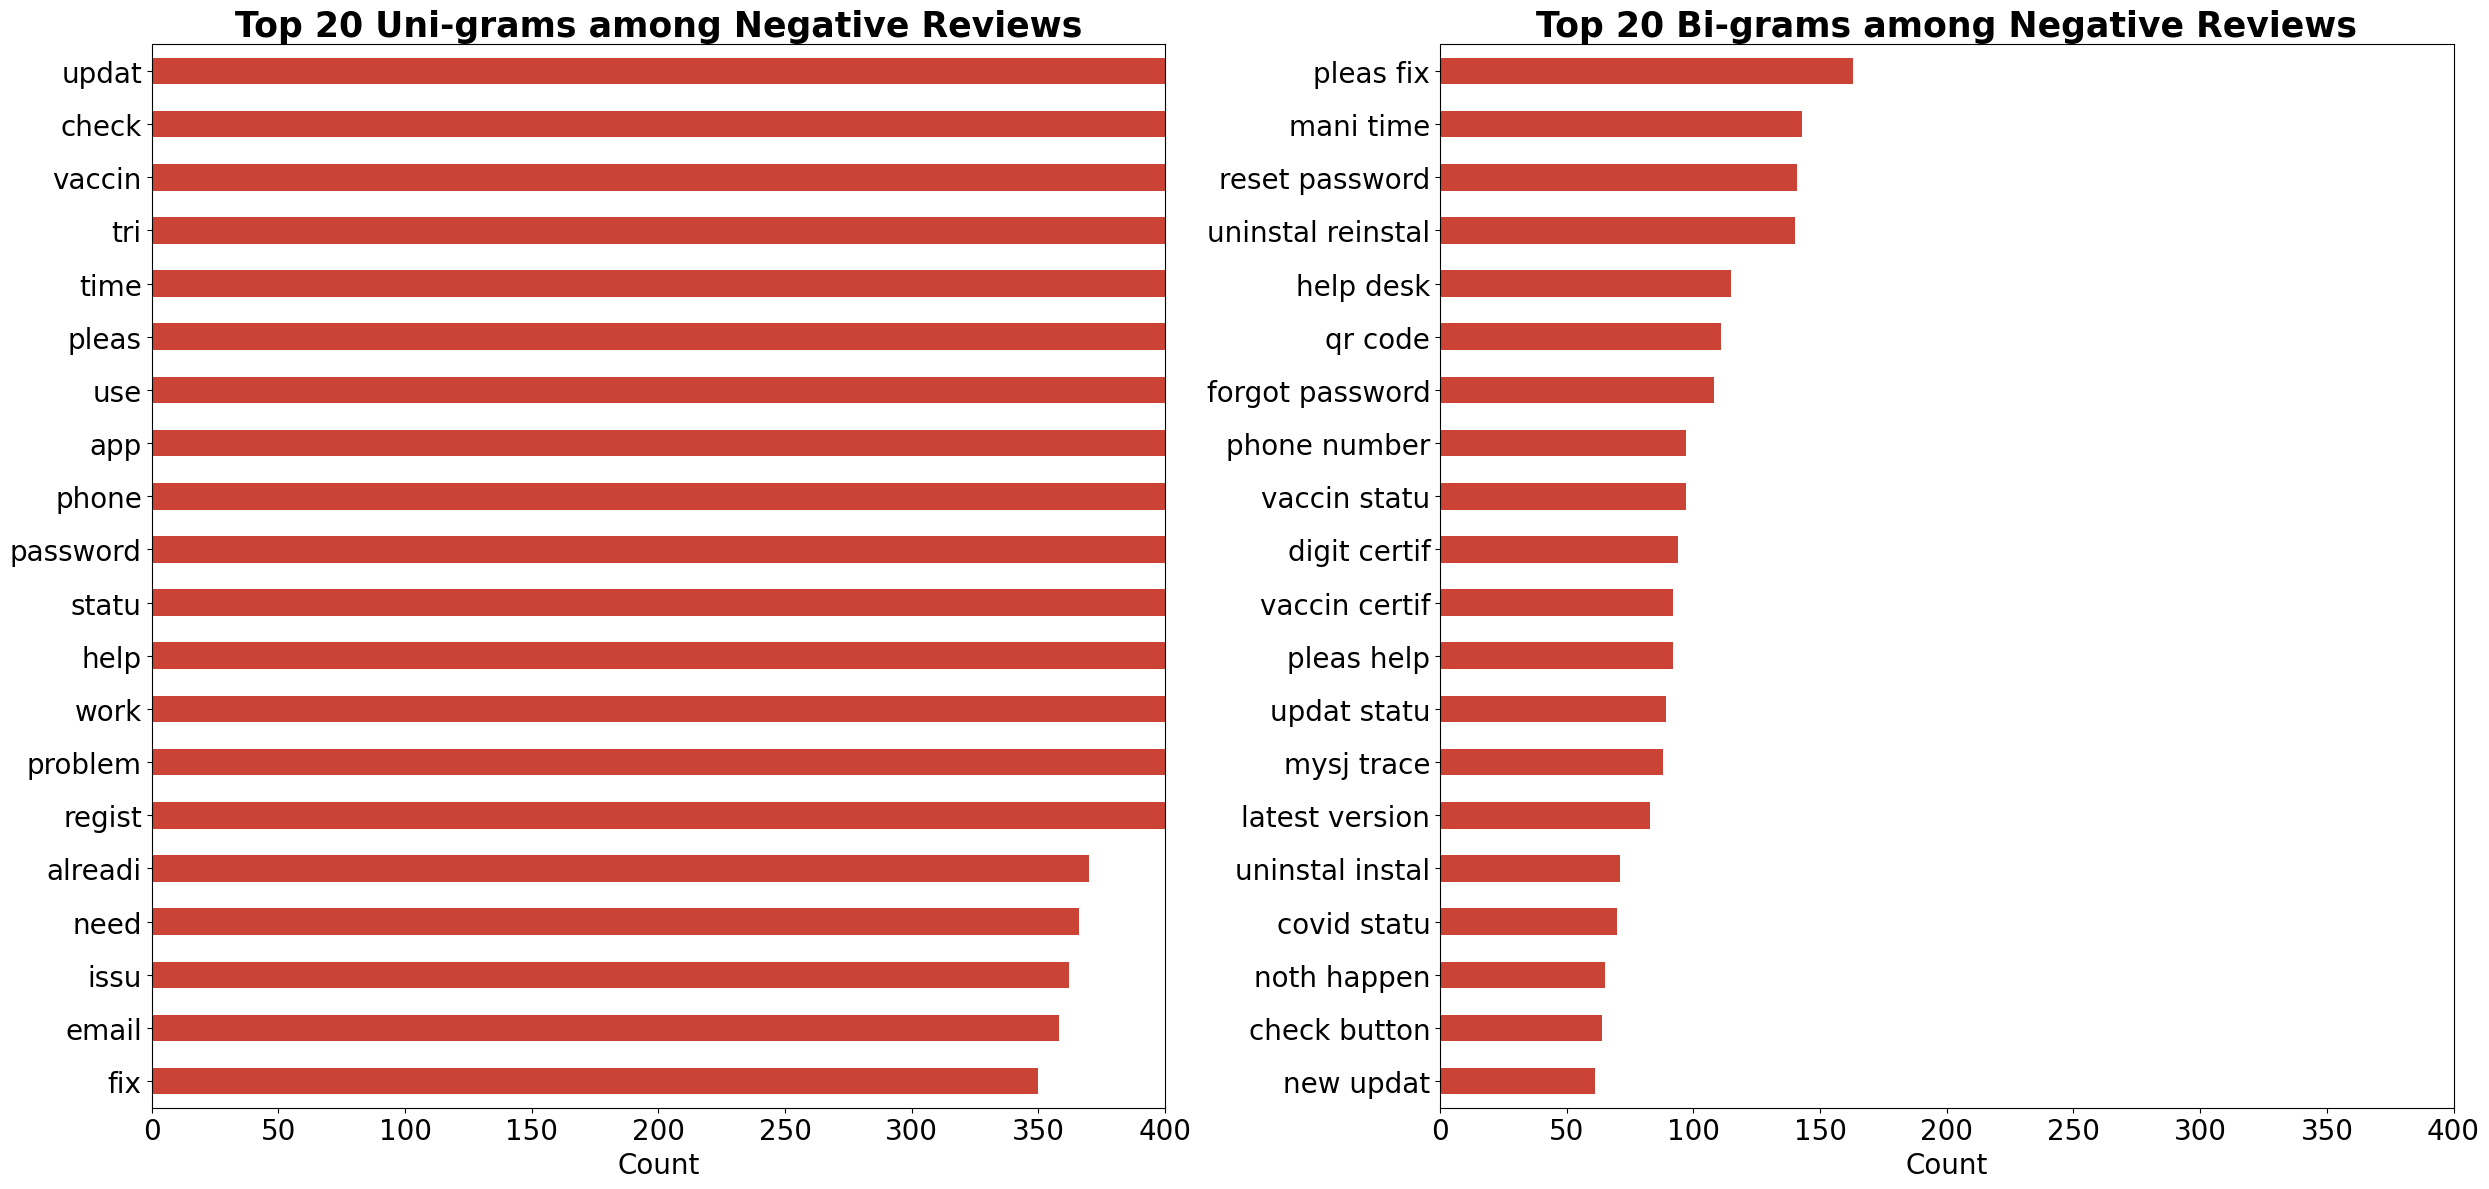

In [51]:

# Plot the uni-grams and bi-grams for negative reviews
barplot_cvec(target=1,
             titles=['Top 20 Uni-grams among Negative Reviews','Top 20 Bi-grams among Negative Reviews'], 
             color='#CB4335',
             xlimit=(0,400))

__'Update', 'check' and 'vaccine'__ are the top 3 most frequently occurring uni-grams in negative reviews. __'please fix' and 'reset password' and 'many time'__ are the top 3 most frequently occurring bi-grams in negative reviews. We can thus infer that the users are facing problem with resetting their password frequently on the app.

In [52]:
# Showing some of the negative reviews with the word 'update'
review_data[(review_data['target']==1) & (review_data['content_stem'].str.contains('updat'))][['content','score']].head()

,content,score
1,"After updating to the latest version which enables downloading of digital certificate, I was happy that finally my Android phone gets to have such feature. However, when I try to open my digital certificate after downloading, ""Permission was denied"" is the only message that I get! It's been like this for few days. I log out and tried again, but the same message! Worst still, after emailing to helpdesk of this issue, there is no response at all (not even in junk folder) !! It's so frustrating!",1
3,"This app is good, but the one that bugs me the most is everytime i scan using the QR scanner, my phone volume will automatically go full blast! Everytime i watch a video after that, my volume is in full blast! There's no permission for volume for the app yet it does just that! Update: It's still the same problem. After using this app to scan/check-in, my media volume shoots up full blast. There's no notification whatsoever indicating this happened.",1
4,"The latest update for MySJ trace is just utterly ridiculous .. I'll still continue to support this as it helps, but make sure it works! I've had zero interactions recorded although I'm with my wife when we need to go out... even sitting in our own dining room with other family members, their phones can detect each other but not mine... I think the previous check in / check out feature was already good enough to detect possible contact of being in same premises... there should have been just a design of an hourly notification to remind people in case they forgot to check out from a premise, e.g. ""are you still here (name of location)""... with option to choose - YES or NO (checkout)... then you have an accurate record for contact tracing. This bluetooth tracing is a good idea, but please check and make it work first .... I personally don't think turning on bluetooth all the time will drain a lot of juice from the phone, but I agree with the constant permanent notification ... that should be off as it is so annoying and serves no purpose.",1
9,"From an IT point of view, the app is not designed properly. The slow response from the app means the designer never thought of the scalability and not planning to expand. I'm sure updates will be slow because server(s) will not be able to take the load. Content wise, I'm sure it's good... What will happen in a few weeks/months like most other government linked apps is going to be questionable.",1
12,"Seems like everyone has the same trouble - no 'check-out' button. The whole point of improving an app is to make it easier and accessible to everyone no matter the age. We expected a better update, not this. Having to enable the bluetooth and location all the time? Do you really want to impose that danger onto everyone by letting anonymous people know where we all are all the time? That's unwise, and it's exposing everyone. The previous version is better. Please do something about the update.",1


In [53]:
# Showing some of the negative reviews with the word 'vaccine'
review_data[(review_data['target']==1) & (review_data['content_stem'].str.contains('vaccin'))][['content','score']].head()

,content,score
30,"App is lousy and has lots of errors. Now, my vaccination record all went missing, unable to update status, unable to refresh status; when click refresh status, it shows turning but will not be done, and it just hang there. When I click vaccination, it shows, ""Unable to connect to server, please try again later."" Seriously, please rectify your problem! For the previous Bluetooth issue, I emailed to the helpdesk, took ages to reply, and else is giving general answers that does not help at all!",1
32,"App is lousy and has lots of errors. Now, my vaccination record all went missing, unable to update status, unable to refresh status; when click refresh status, it shows turning but will not be done, and it just hang there. When I click vaccination, it shows, ""Unable to connect to server, please try again later."" Seriously, please rectify your problem! For the previous Bluetooth issue, I emailed to the helpdesk, took ages to reply, and else is giving general answers that does not help at all!",1
39,"I was told I needed to install and regester on this app before flying into KL but the app doesn't work I can't regester, so what solution is there? Just fly to Malaysia and hope for the best? *Edit, nobody at KL Airport asked if I had the app or even asked about my vaccination status. But I have my international vaccination certificate with me anyway if anyone needs to see it.",1
41,"App is super buggy, doesn't register the first time I entered my vaccination status. If it doesn't accept pdf why is it an option to add the document? There's no error states to tell me what I do wrong in the whole form. Everything is mandatory even if I'm not a local and don't have a house... Overall it was really frustrating trying to understand and complete the form properly. It was also very redundant and annoying to have a pop up to reconfirm every action I do. Process needs to be simplied",1
42,"App keeps restarting when I am trying to fill in traveller vaccination form After a few times of restarting, the page to fill in details no longer work. Even the website becomes down despite trying to access via browser (??????) Uploading proof of vaccination is vague; I can't tell whether I have uploaded the file, whether it's in progress or whatever. There's no indication whatsoever. There are so many more issues highlighted by others and not enough space to write here. Hope these gets fixed.",1


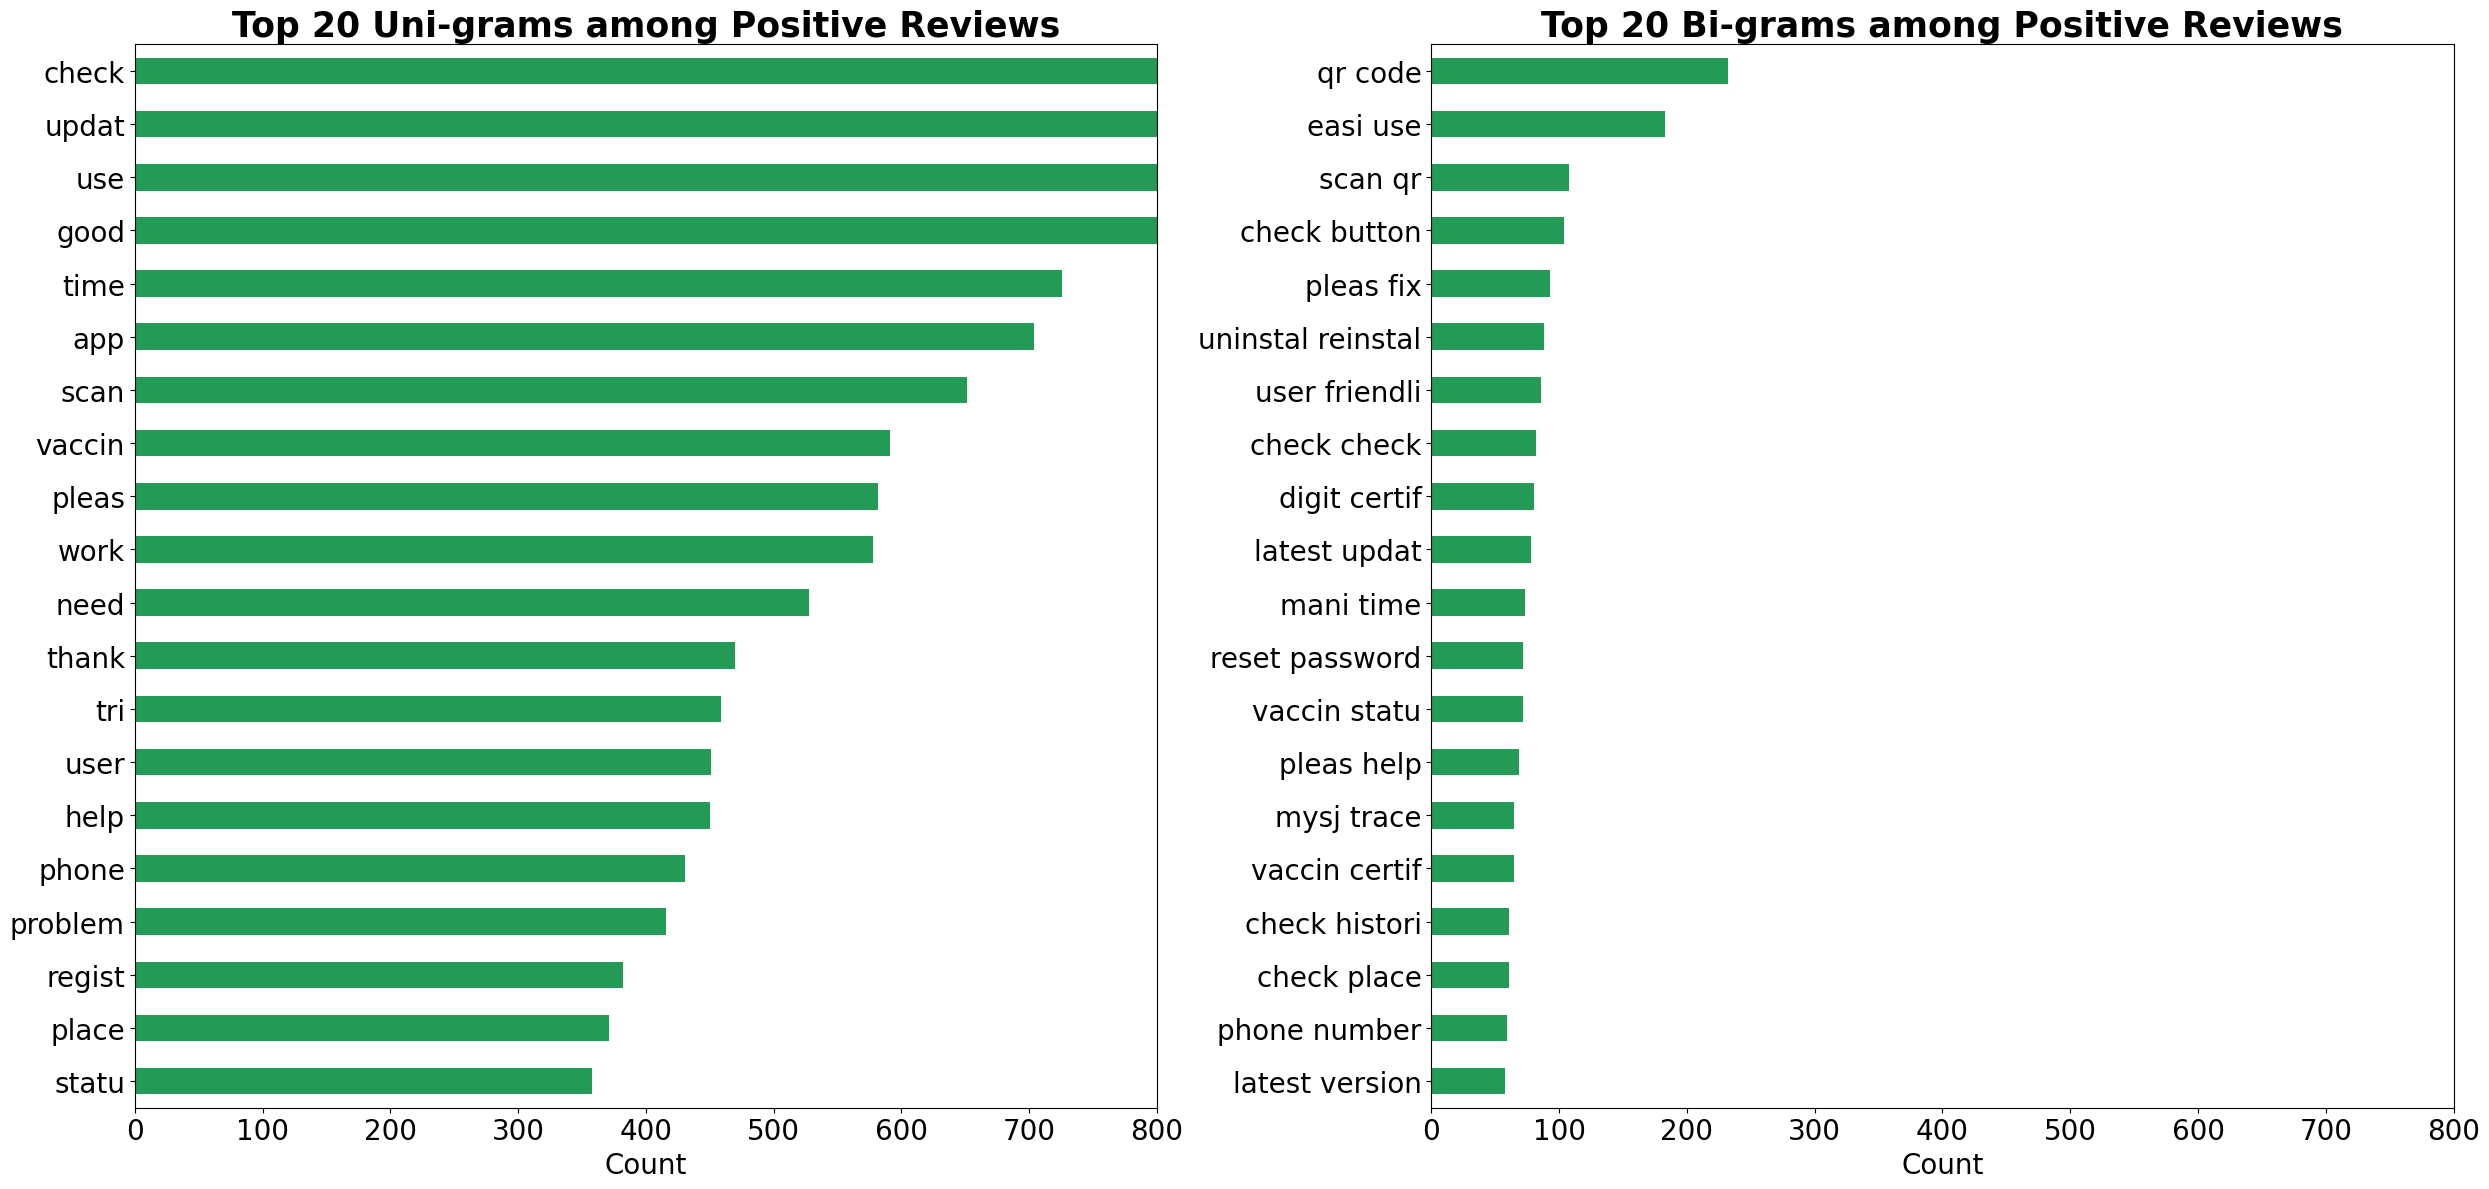

In [54]:
# Plot the uni-grams and bi-grams for positive reviews
barplot_cvec(target=0,
             titles=['Top 20 Uni-grams among Positive Reviews','Top 20 Bi-grams among Positive Reviews'], 
             color='#239B56',
             xlimit=(0,800))

__'Check', 'Update', 'Use'__ are the top 3 most frequently seen uni-grams in positive reviews. The bi-grams also give us some context to the word __'qr code'__ and __'easi use'__, where it probably refers to an 'easy to use' apps by the users.

In [55]:
# Showing some of the positive reviews with the word 'use'
review_data[(review_data['target']==0) & (review_data['content_stem'].str.contains('use'))][['content','score']].head()

,content,score
3537,"Yeah. Agree with some comments that suggested that the app should immediately go the code scanning mode upon launch. The option to choose dependants can be created on top of the scan window where user can just swipe to discard it if it is not applicable at any particular time. A menu called Close should be renamed as Menu as it is quite misleading. Anyway, good job, yet there's still rooms for improvement.",3
3538,"It's user-friendly but still can be improved. Instead of spamming the pop up of whether users like the app or not and to rate, it would be good to incorporate a push notification for places we are still checked in after a certain amount of time just as a reminder incase we forget to check out. The list of checked-in places is quite confusing as we have to scroll through and click each place to see if we have checked out.",3
3539,"Issue: On several occasions, the app refuses to scan the barcode, even after readjusting the zoom of the camera and removing light reflection. Very frustrating when it happened. Improvement: When opening the app, the app shows the app logo first. Considering nowadays people are opening the apps to scan the barcode immediately, it does feel abit slow (in getting to the scanning screen). I think shortening the time (or removing it completely) will make for better user experience.",3
3540,"It's alright, pretty handy and expected. The loading and scanning when you want to check in is quite fast, so that's always a plus! Also, the news and updates provided are a cool feature. Though, why isn't there Chinese available? My grandparents are finding this 'simple' app difficult to use because of the lack of a broader language choice. It makes me sad to see them unable to utilise this app as easily as everyone else. Add the option to use the app in Chinese, come on.",3
3541,"Scanning QR codes in certain conditions (like when the paper is laminated) is a headache as the app sometimes doesn't detect it. A QR scanner app I use works so much better and faster, but it's more tedious because I have to fill up all my information manually in Chrome. I hope the developer will improve the QR scanner. And yes, I point my camera at the right angle so it isn't due to human error. The app also occasionally asks to give a rating even though I selected the ""Never"" option.",3


In [56]:
# Showing some of the positive reviews with the word 'check'
review_data[(review_data['target']==0) & (review_data['content_stem'].str.contains('check'))][['content','score']].head()

,content,score
3536,"Checking out feature need improvement because sometimes people forget to check out, leaving the impression that the person is still there when he/she would have left. Suggestion, when check to a new location, the system should check out the person at the previous location because you can't be at 2 location on the same time. Thank you.",3
3538,"It's user-friendly but still can be improved. Instead of spamming the pop up of whether users like the app or not and to rate, it would be good to incorporate a push notification for places we are still checked in after a certain amount of time just as a reminder incase we forget to check out. The list of checked-in places is quite confusing as we have to scroll through and click each place to see if we have checked out.",3
3540,"It's alright, pretty handy and expected. The loading and scanning when you want to check in is quite fast, so that's always a plus! Also, the news and updates provided are a cool feature. Though, why isn't there Chinese available? My grandparents are finding this 'simple' app difficult to use because of the lack of a broader language choice. It makes me sad to see them unable to utilise this app as easily as everyone else. Add the option to use the app in Chinese, come on.",3
3546,"Nice app. But, user can keep screenshots and use it everytime the screenshot while checkin without use this app, because most (I guess 99% time ) security/person incharge doesnot check location,date,time etc. So, my suggestion is if your app maybe can show this check-in page with all location,date,time data and animation heartbeat or something else. So, persons in charge of premises can understand he/she scan JUST NOW and it's not a WALLPAPER. Thanks.",3
3547,"Easy to use. Convenient for check-in. Only 3 stars because the latest update requires me to have Bluetooth and location on all the time. That eats up battery very quickly. When we check-in, the location already there. Why do we need to have location on?? Give good solution and you can have the last 2 stars.",3


### Save both two set of dataset for Machine Learning Modelling

In [57]:
#export dataset out

review_data.to_csv('dataset_experiment_1.csv')
review_data2.to_csv('dataset_experiment_2.csv')